In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

# Combine the data into a single dataset
city_ride_data_df = pd.merge(ride_data_df, city_data_df, on = 'city', how = 'left')

# Display the data table for preview
city_ride_data_df.head()

# Exporting the Merged Table to csv file
#city_ride_data_df.to_csv("output/combined_dataset.csv", index=False, header=True)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
grouped_city_type_df = city_ride_data_df.groupby(['city','type'])
grouped_city_type_df.count().head()

,,date,fare,ride_id,driver_count
city,type,,,,
Amandaburgh,Urban,18,18,18,18
Barajasview,Urban,22,22,22,22
Barronchester,Suburban,16,16,16,16
Bethanyland,Suburban,18,18,18,18
Bradshawfurt,Rural,10,10,10,10


In [3]:
fare_series = grouped_city_type_df['fare'].mean()
#grouped_city_type_df['fare'].mean()
#fare_list
Average_Fare_df = round(pd.DataFrame(fare_series),2)
Average_Fare_df.head()
Ride_Sharing_df = Average_Fare_df.rename(columns = {"fare" : "Average Fare ($)"})
Ride_Sharing_df.head()

,,Average Fare ($)
city,type,
Amandaburgh,Urban,24.64
Barajasview,Urban,25.33
Barronchester,Suburban,36.42
Bethanyland,Suburban,32.96
Bradshawfurt,Rural,40.06


In [4]:
Ride_Sharing_df['Total Number of Rides (Per City)'] = grouped_city_type_df['driver_count'].count()
Ride_Sharing_df['Driver Count Per City'] = grouped_city_type_df['driver_count'].max()
Ride_Sharing_df.head()
#Ride_Sharing_df.dtypes
#Ride_Sharing_df.columns

,,Average Fare ($),Total Number of Rides (Per City),Driver Count Per City
city,type,,,
Amandaburgh,Urban,24.64,18,12
Barajasview,Urban,25.33,22,26
Barronchester,Suburban,36.42,16,11
Bethanyland,Suburban,32.96,18,22
Bradshawfurt,Rural,40.06,10,7


In [5]:
Ride_Sharing_df.columns

Index(['Average Fare ($)', 'Total Number of Rides (Per City)',
       'Driver Count Per City'],
      dtype='object')

In [6]:
Ride_Sharing_index_to_columns_df = Ride_Sharing_df.reset_index(inplace=False)#()#(drop=True)
Ride_Sharing_index_to_columns_df = Ride_Sharing_index_to_columns_df.set_index("city")
Ride_Sharing_index_to_columns_df.head()
#Ride_Sharing_index_to_columns_df.columns

,type,Average Fare ($),Total Number of Rides (Per City),Driver Count Per City
city,,,,
Amandaburgh,Urban,24.64,18,12
Barajasview,Urban,25.33,22,26
Barronchester,Suburban,36.42,16,11
Bethanyland,Suburban,32.96,18,22
Bradshawfurt,Rural,40.06,10,7


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for each of the three city types
urban = Ride_Sharing_index_to_columns_df.loc[Ride_Sharing_index_to_columns_df["type"] == "Urban"]
suburban = Ride_Sharing_index_to_columns_df.loc[Ride_Sharing_index_to_columns_df["type"] == "Suburban"]
rural = Ride_Sharing_index_to_columns_df.loc[Ride_Sharing_index_to_columns_df["type"] == "Rural"]

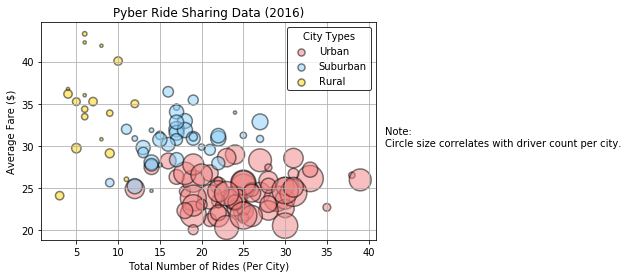

In [8]:
# Build the scatter plots for each city types
# Urban
plt.scatter(urban["Total Number of Rides (Per City)"], urban["Average Fare ($)"], color = "lightcoral", edgecolors="black", s = urban["Driver Count Per City"]*10, label = "Urban", alpha = 0.5, linewidth = 1.5)

# Suburban
plt.scatter(suburban["Total Number of Rides (Per City)"], suburban["Average Fare ($)"], color = "lightskyblue", edgecolors ="black", s = suburban["Driver Count Per City"]*10, label = "Suburban", alpha = 0.5, linewidth = 1.5)

# Rural
plt.scatter(rural["Total Number of Rides (Per City)"], rural["Average Fare ($)"], color = "gold", edgecolors = "black", s = rural["Driver Count Per City"]*10, label = "Rural", alpha = 0.5, linewidth = 1.5)

# Incorporate the other graph properties
#Add title, x axis label and y axis label.
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.text(42, 30,"Note:\nCircle size correlates with driver count per city.")

# Create a legend
lgnd = plt.legend(frameon = True, title = 'City Types', edgecolor = 'black', loc= "upper right")
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Show Grid
plt.grid()

# Save Figure
plt.savefig("figures/Pyber_Ride_Sharing_Data_2016.png", bbox_inches = 'tight')

#Show plot.
plt.show()

## Total Fares by City Type

C:\Users\sjbbh\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


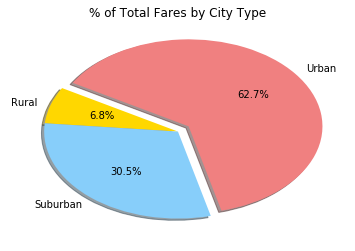

In [9]:
# Calculate Type Percents
grouped_citytype_fare_df = city_ride_data_df.groupby(['type'])
citytype_fare_df = grouped_citytype_fare_df['fare'].sum()

# Build Pie Chart
pie_labels_citytype_fares = pd.DataFrame(citytype_fare_df).index
pie_colors_citytype_fares = ['gold', 'lightskyblue', 'lightcoral']
pie_explode_citytype_fares = [0, 0, 0.1]

plt.pie(citytype_fare_df, labels = pie_labels_citytype_fares, autopct = '%1.1f%%', colors = pie_colors_citytype_fares, \
       explode = pie_explode_citytype_fares, shadow = True, startangle = 150)
plt.axes().set_aspect(0.65)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("figures/Pyber_Total_Fares_2016.png", bbox_inches = 'tight')

# Show Figure
plt.show()

## Total Rides by City Type

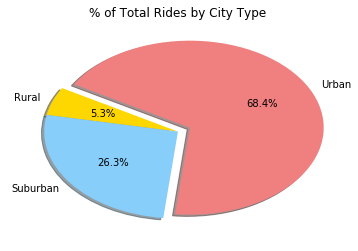

In [10]:
# Calculate Ride Percents
grouped_citytype_rides_df = city_ride_data_df.groupby(['type'])
citytype_rides_df = grouped_citytype_rides_df['ride_id'].count()

# Build Pie Chart
pie_labels_citytype_rides = pd.DataFrame(citytype_rides_df).index
pie_colors_citytype_rides = ['gold', 'lightskyblue', 'lightcoral']
pie_explode_citytype_rides = [0, 0, 0.1]

plt.pie(citytype_rides_df, labels = pie_labels_citytype_rides, autopct = '%1.1f%%', colors = pie_colors_citytype_rides, \
       explode = pie_explode_citytype_rides, shadow = True, startangle = 150)
plt.axes().set_aspect(0.65)
plt.title('% of Total Rides by City Type')


# Save Figure
plt.savefig("figures/Pyber_Total_Rides_2016.png", bbox_inches = 'tight')

# Show Figure
plt.show()

## Total Drivers by City Type

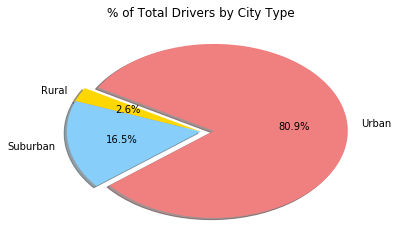

In [11]:
# Calculate Driver Percents
grouped_citytype_drivers_df = city_data_df.groupby(['type'])
citytype_drivers_df = grouped_citytype_drivers_df['driver_count'].sum()

# Build Pie Charts
pie_labels_citytype_drivers = pd.DataFrame(citytype_drivers_df).index
pie_colors_citytype_drivers = ['gold', 'lightskyblue', 'lightcoral']
pie_explode_citytype_drivers = [0, 0, 0.1]

plt.pie(citytype_drivers_df, labels = pie_labels_citytype_drivers, autopct = '%1.1f%%', colors = pie_colors_citytype_drivers, \
       explode = pie_explode_citytype_drivers, shadow = True, startangle = 150)
plt.axes().set_aspect(0.65)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("figures/Pyber_Total_Drivers_2016.png", bbox_inches = 'tight')

# Show Figure
plt.show()